## Prueba de  Modelos supervisados
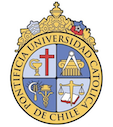

#### Pontificia Universidad Católica de Chile
Diplomado en Data Science

Septiembre 2021


### Nombre:
Pablo Opazo 
Mario Guajardo


Utilizaremos un set de datos de las policias de New York del año 2009 y 2010. (`2009_1perc.csv` y `2010_1perc.csv`) los cuales nos darán información de los procedimientos policiales realizados. Además se le entregará el diccionario de variables para que pueda consultar que significa cada categoría dentro de las variables.

- La variable respuesta 'arstmade' informa si los procedimientos policiales han terminado en arresto o no, y el objetivo será realizar un modelo de Machine Learning para predecir si un futuro procedimiento terminará en arresto.

# 1.- Enliste todas las librerias que utilizará (0.5 puntos)
Nota: Se recomienda ir actualizando la lista conforme las necesidades vaya teniendo durante el desarrollo de la prueba

In [72]:
import pandas as pd 
import numpy as np 
import missingno as msno
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import OneHotEncoder
from statsmodels.graphics.mosaicplot import mosaic

# 2.- Importación y revisión de los datos (1 punto)

Importe ambos sets. Dado que la fuente de datos proviene de la misma base, tienen las mismas columnas. Consolide ambos sets y reporte una exploración *básica* de los datos (numero de filas/columnas, tipos de datos, estadísticas básicas, casos perdidos)

In [24]:
df1 = pd.read_csv("2009_1perc.csv")
df2 = pd.read_csv("2010_1perc.csv")
df_consolidado = df1.append(df2)
df_consolidado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11825 entries, 0 to 6012
Columns: 112 entries, Unnamed: 0 to detailcm
dtypes: float64(1), int64(16), object(95)
memory usage: 10.2+ MB


In [47]:
df_consolidado.describe()

,Unnamed: 0,year,pct,ser_num,datestop,timestop,perobs,perstop,compyear,comppct,repcmd,revcmd,dob,age,ht_feet,ht_inch,weight,,month,meters
count,11825.000000,11825.000000,11825.000000,11825.000000,1.182500e+04,11825.000000,11825.000000,11825.000000,11825.0,11825.0,11825.000000,11825.000000,1.182500e+04,11825.000000,11825.000000,11825.000000,11825.000000,11825.000000,11825.000000,11825.000000
mean,295983.814799,2009.508499,68.625624,5697.994334,6.364221e+06,1413.725497,2.654391,5.649556,0.0,0.0,243.354926,238.986385,7.316195e+06,28.968541,5.183340,6.408034,170.093615,7.051078,7.051078,1.742646
std,170820.705702,0.499949,33.037826,5152.486022,3.429091e+06,744.726359,9.759031,9.758535,0.0,0.0,297.788599,299.394740,3.729206e+06,29.205278,0.398801,3.405503,37.195884,3.291323,3.291323,0.082108
min,52.000000,2009.000000,1.000000,1.000000,1.012009e+06,0.000000,0.000000,1.000000,0.0,0.0,1.000000,1.000000,1.011900e+06,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.914400
25%,147515.000000,2009.000000,42.000000,2002.000000,3.232009e+06,1000.000000,1.000000,3.000000,0.0,0.0,70.000000,66.000000,4.121982e+06,19.000000,5.000000,4.000000,150.000000,4.000000,4.000000,1.701800
50%,296652.000000,2010.000000,73.000000,4366.000000,6.162010e+06,1605.000000,1.000000,5.000000,0.0,0.0,105.000000,103.000000,7.261982e+06,25.000000,5.000000,7.000000,170.000000,7.000000,7.000000,1.752600
75%,443097.000000,2010.000000,102.000000,7840.000000,9.232009e+06,2035.000000,3.000000,5.000000,0.0,0.0,177.000000,176.000000,1.105199e+07,34.000000,5.000000,9.000000,180.000000,10.000000,10.000000,1.803400
max,601281.000000,2010.000000,123.000000,31694.000000,1.231201e+07,2830.000000,926.000000,857.000000,0.0,0.0,879.000000,879.000000,1.231200e+07,999.000000,7.000000,11.000000,999.000000,12.000000,12.000000,2.413000


In [49]:
df_consolidado.shape

(11825, 116)

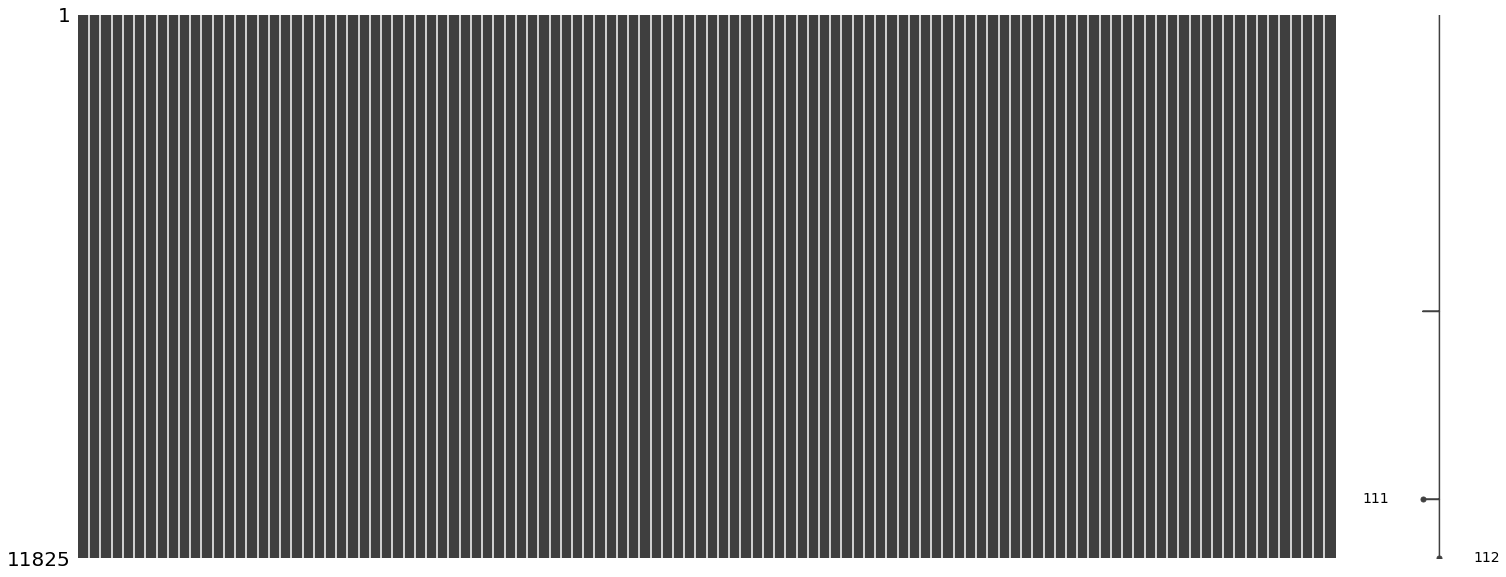

In [28]:
msno.matrix(df_consolidado)

# 3.- Preprocesamiento de datos (1 punto)
Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los siguientes pasos para limpiar este set:

- 3.1 Obtenga una lista con todas las variables categoricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categoricas

In [ ]:
df_consolidado.dtypes

In [32]:
df_categorical = pd.DataFrame()

for column in df_consolidado.select_dtypes(include='object'):
    if df_consolidado[column].nunique() >=2 and df_consolidado[column].nunique() <= 99:
        df_categorical[column] = df_consolidado[column].astype('category')

df_categorical

# eliminar categorás que solamente tienen datos NA
#df_categorical.drop(columns=['forceuse','adtlrept','machgun'], inplace = True)

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,race,haircolr,eyecolor,build,addrtyp,city,sector,beat,dettypcm,linecm
0,A,O,P,P,Y,N,N,N,Y,,...,B,BK,BR,M,L,BRONX,G,7,CM,1
1,A,O,P,P,Y,Y,N,N,N,,...,A,BK,BR,T,L,QUEENS,J,,CM,1
2,1,O,P,V,Y,N,N,N,N,,...,Q,BR,BR,M,L,BRONX,E,,CM,1
3,A,O,P,P,Y,N,N,N,Y,,...,B,BK,BR,T,L,BROOKLYN,J,4,CM,1
4,A,O,P,P,Y,Y,N,N,Y,,...,Q,BK,BR,M,L,QUEENS,H,,CM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,1,O,H,P,Y,N,N,N,Y,,...,B,BK,BR,T,L,BROOKLYN,I,,CM,1
6009,A,O,P,R,Y,N,N,N,N,,...,Z,BK,BR,M,L,BROOKLYN,A,,CM,1
6010,A,O,P,P,Y,N,N,Y,Y,,...,W,GY,Z,M,L,STATEN IS,E,,CM,1
6011,1,O,P,P,Y,N,N,N,N,I,...,Q,BK,BR,M,L,QUEENS,E,,CM,1


- 3.2 Reemplaze las siguientes clases faltantes:

  -Si alguna categoría de las columnas officrid,  o offverb es igual a "" cambielo a 'N' y en caso contrario dejelo como 'Y'
  
  -Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA, dependiendo de como haya catgado la base de datos), cambielo a 'U' y en caso contrario mantenga su valor
  
Nota, los valores significan {N: No, Y: Yes, U: Unknown}

In [36]:
df_categorical['officrid'] = df_categorical['officrid'].str.replace(' ','N', regex = True)
# df_categorical['offshld'] = df_categorical['offshld'].str.replace(' ','N', regex = True)
df_categorical['offverb'] = df_categorical['offverb'].str.replace(' ','N', regex = True)

df_categorical['sector'] = df_categorical['sector'].str.replace(' ','U', regex = True)
df_categorical['trhsloc'] = df_categorical['trhsloc'].str.replace(' ','U', regex = True)
df_categorical['beat'] = df_categorical['beat'].str.replace(' ','U', regex = True)


- 3.3 Transforme las columnas ht_feet junto con ht_inch en una única columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)

In [42]:
def transform_metrics(feet, inch):
    return (feet *  0.3048 + inch *0.0254)

df_consolidado['meters'] = df_consolidado.apply(lambda x : transform_metrics(x['ht_feet'], x['ht_inch']), axis=1)
df_consolidado['meters']

0       1.7526
1       1.6510
2       1.9050
3       1.6510
4       1.6764
         ...  
6008    1.7780
6009    1.7018
6010    1.8288
6011    1.8034
6012    1.8542
Name: meters, Length: 11825, dtype: float64

- 3.4 Note que la fecha viene en un formato MMDDAAAA en la columna datestop. Genere 2 nuevas columnas llamadas month y year que solo tenga el mes y el año respectivamente.

Hint: Explore la libreria lubridate https://www.rstudio.com/resources/cheatsheets/ 

In [43]:
df_consolidado['fecha'] = pd.to_datetime(df_consolidado['datestop'], format= '%m%d%Y')
df_consolidado['month'] = pd.DatetimeIndex(df_consolidado['fecha']).month
df_consolidado['month'].head()

0     4
1    10
2    10
3    12
4    12
Name: month, dtype: int64

> Respuesta: Se crea la columna 'month' para almacenar el mes, sin embargo se omite la creación de la variable año que ya existe con el nombre 'Year'

 - 3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas edades esten entre 18 y 100 años, ambos inclusive.

In [67]:
df_final = df_categorical
df_final['month'] = df_consolidado['month']
df_final['year'] = df_consolidado['year']
df_final['meters'] = df_consolidado['meters']
df_final['age'] = df_consolidado['age']

df_final = df_final[(df_final['age']>=18) & (df_final['age']<= 100)]
df_final['age'].min()
df_final['age'].max()


print(f"Respuesta: El valor mínimo queda en {df_final['age'].min()}, el valor máximo queda en {df_final['age'].max()}. Con un total de {df_final.shape[0]} registros")

Respuesta: El valor mínimo queda en 18, el valor máximo queda en 100. Con un total de 10078 registros


# 4.- Análisis exploratorio (1 punto)

- 4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente

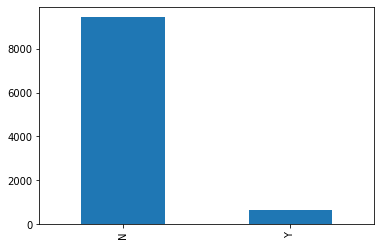

In [69]:
df_final['arstmade'].value_counts().plot(kind = 'bar')

RESPUESTA: Podemos ver que la variable está *desbalanceada* hacia el evento negativo por lo que podemos deducir que en la mayor cantidad de los datos controlados no se realizó un arresto 

- 4.2.- Estudie la relación de la variable respuesta en comportamiento con la raza (race), comente.

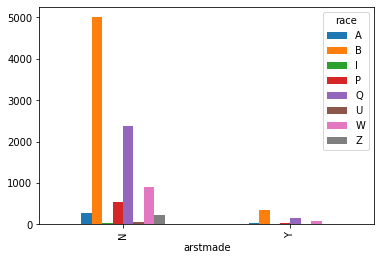

In [76]:
df_arstmade_race = pd.DataFrame()
df_arstmade_race = df_final[['arstmade','race']].copy()
pd.crosstab(df_arstmade_race['arstmade'], df_arstmade_race['race']).plot.bar()


- 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo (sex), comente.

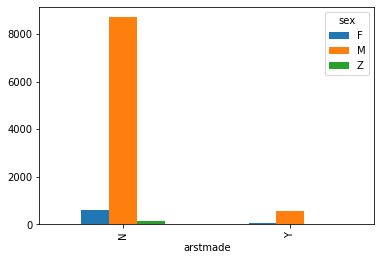

In [77]:
df_arstmade_sex = pd.DataFrame()
df_arstmade_sex = df_final[['arstmade','sex']].copy()
pd.crosstab(df_arstmade_sex['arstmade'], df_arstmade_sex['sex']).plot.bar()
#mosaic()
#plt.mosaic(df_arstmade_sex,['arstmade','sex'])

- 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo y la edad en su conjunto, comente.

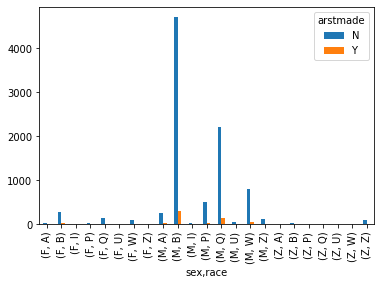

In [78]:
pd.crosstab([df_final['sex'],df_final['race']],df_final['arstmade']).plot.bar()

- 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y

In [236]:
df_final['coded_arstmade'] = df_final['arstmade'].apply(lambda x : 1 if x == 'Y' else 0)
df_final['coded_arstmade'] 

0       0
1       0
2       0
3       0
4       0
       ..
6008    0
6009    0
6010    0
6011    0
6012    0
Name: coded_arstmade, Length: 11825, dtype: category
Categories (2, int64): [0, 1]

- 4.5 Muestre en un gráfico la probabilidad que un individuo sea arrestado,condicional al género y a la raza. ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?.

AttributeError: Cannot access attribute 'shape' of 'DataFrameGroupBy' objects, try using the 'apply' method

# 5.- Determinar si el procedimiento policial concluirá en alguna acción violenta. (0.5 puntos)

Los atributos que tienen el prefijo pf (`['pf_hands'],['pf_wall'], ['pf_grnd'], ['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y ['pf_other']`) indican si hubo fuerza fisica utilizada por el oficial al momento del procedimiento, con la marca 'Y'. 

Genere una nueva variable llamada 'violencia' la cual sea 1 si en cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego indique el porcentaje de casos que terminaron con violencia.

# 6.- Modelación (2 puntos)

- 6.1 Genere las variables dummies correspondientes (Tenga cuidado de no utilizar variables que expliquen lo mismo, ¡recuerde que acaba de crear una variable a partir de otras!, además recuerde que creó una variable numérica que es una categoría :) ). Luego genere los sets de train-test  utilizando el año 2009 para entrenar, y el año 2010 para testear. (0.5 pts)

- 6.2  Entrene 4 modelos de clásificación y reporte el mejor modelo bajo algún criterio. Utilice validación cruzada de al menos 2 folds para probar distintos hiperparámetros para cada modelo (puede probar cualquier hiperparámetro, pero debe ser al menos uno). (1.5 pts)

In [ ]:
#crear modelo 
# separar
# cross validation 
# seleccionar modelo 

# entrenar
# resultados y validaciones (Curva ROC, Matriz de confusión)

# Bonus (0.5 pts)

¿Que puede hacer para mejorar la predicción de los modelos?